# AUTOMATING STATISTICAL ANALYSIS

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import csv


## STAGING DATA

In [85]:
dataPath = "dataset for kids-20230919T000215Z-001\\dataset for kids"

dataFiles = os.listdir(dataPath)
dataFilesPath = [os.path.join(dataPath,file) for file in dataFiles if 
                 file.split(".")[0].split("_")[-1]=="B1" and "BaseNoise" not in file and "csv" in file]

print("Number of files to process:", len(dataFilesPath))


Number of files to process: 196


In [94]:
def getDataPoints(filepath):
    ## GETTING DATA FROM CSV FILE
    dataPoints = []
    idx = []
    with open(filepath) as f:
        reader = csv.reader(f)
        for i in range(6): next(reader)
        for row in reader:
            if len(row) > 0: 
                idx.append(row[0])
                dataPoints.append(row[1])

    dataPoints = np.array(dataPoints, dtype=float)
    idx = np.array(idx, dtype=float)
    return idx,dataPoints

In [155]:
## GETTING MEAN OF ALL IMAGES
meanImages = []
idx = []
flag = 0
for path in dataFilesPath:
    if flag == 0:
        idx,dataPoints = getDataPoints(path)
        flag = 1
        continue
    _,dataPoints = getDataPoints(path)
    meanDataPoints = np.mean(dataPoints)
    meanImages.append(meanDataPoints)


In [ ]:
# ## GETTING MEAN OF ALL IMAGES
# meanPerStep = []
# idx = []
# flag = 0
# for path in dataFilesPath:
#     if flag == 0:
#         idx,dataPoints = getDataPoints(path)
#         flag = 1
#         for data in dataPoints):
#             meanPerStep.append([data])
#         continue
#     _,dataPoints = getDataPoints(path)
#     for n,data in enumerate(dataPoints):
#         meanPerStep[n].append(data)


In [149]:
# meanPerStep = np.array([np.mean(x) for x in meanImages]).T

In [152]:
idxSteps = [i for i in range(0, len(meanImages))]
idxSteps = np.array(idxSteps).T

ValueError: x and y must have same first dimension, but have shapes (41666,) and (195,)

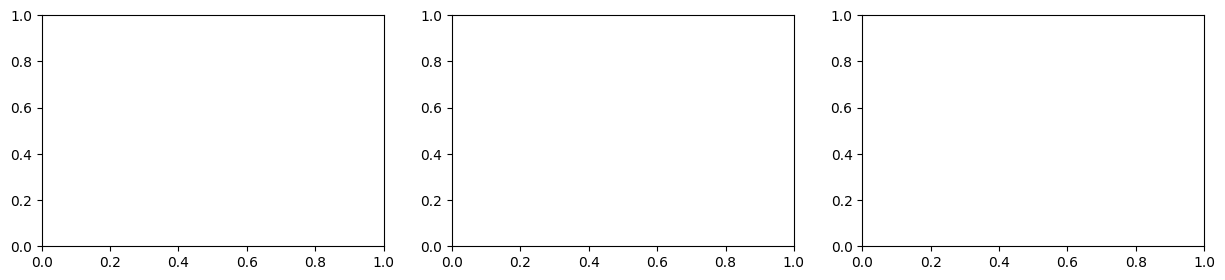

In [156]:
## PLOTTING RAW VALUES AND ZSCORE DISTRIBUTION OF DATA
_,dataPoints = getDataPoints(dataFilesPath[8])
step = 0
#### GETTING MEAN, STD, AND ZSCORE OF DATA
meanDataPoints = np.mean(dataPoints)
stdDataPoints = np.std(dataPoints)
zscoreDataPoints = [(x-meanDataPoints)/stdDataPoints for x in dataPoints]

#### PLOTTING DATA
## PLOTTING SIDE BY SIDE
figure, axs = plt.subplots(nrows=1, ncols= 3, figsize=(15,3))
#### LINECHART
name = f"Step #{step}"
txt = f"mean = {meanDataPoints}\nstd = {stdDataPoints}"
axs[0].plot(idxSteps,meanImages)
axs[0].set_title(name)
axs[1].plot(idx,dataPoints)
axs[1].set_title(name)
# axs[1].set_text(0.1,0.1, txt)
#### HISTOGRAM
axs[2].hist(zscoreDataPoints, bins = 200)
#### SAVE PLOT
# figure.suptitle(name)
plt.show()
